<h1 style="text-align: center;">Task-1P: Introduction to Python and Jupyter Notebooks</h1>
<h3 style="text-align: right;">Name: Yatharth Deoly</h3>
<h3 style="text-align: right;">StudentId: 224207854</h3>
<h3 style="text-align: right;">EmailId: yatharthdeoly@gmail.com</h3>


## Introduction
The Body Mass Index(BMI) is a medical screening tool that estimates body fat by measuring a person's height and weight. It is derived by dividing a person's weight in kilograms by their squared height in meters (kg/m^2^). The formula to calculate BMI using Imperial measurement is weight in pounds into 703 by their squared height in inches (703*lb/in^2^).

So, BMI formula is derived as:
$$ \boldsymbol{BMI}  =  (\frac{mass_{kg}}{height_m^2})  =  (\frac{mass_{lb}}{height_{in}^2}) \times 703 $$

BMI has categorised individuals into weight groups as:
<center>

| **Category** 	|   **BMI**   	|
|:------------:	|:-----------:	|
|  Underweight 	|    < 18.5   	|
| Normal Range 	| 18.5 - 24.9 	|
|  Overweight  	| 25.0 - 29.9 	|
|     Obese    	|    ≥ 30.0   	|

</center>

### New BMI (exponent of 2.5)
In 2013, a revised formula for BMI was proposed by Nick Trefethen, a mathematician from Oxford University in the United Kingdom.
He recommends that:
- multiplies the weight by 1.3 for metric measures (kg), or by 5,734 for imperial measures (lb)
- divides the weight by height to the power of 2.5, instead of 2, or squared
So, new BMI formula is derived as:
$$ \boldsymbol{New\_BMI}  =  (\frac{mass_{kg}}{height_m^2}) \times 1.3  =  (\frac{mass_{lb}}{height_{in}^2}) \times 5734 $$

Defining imports at the top that will be used by the report.
In this case, having all the imports at the top is more intuitive than having some of them at the top and some of them scattered over the file.

In [1]:
import warnings

# Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
import matplotlib
import matplotlib.pyplot as plt

# Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.
import seaborn as sns

# Ignore all warnings generated by the Python program
warnings.filterwarnings("ignore")

# This command tells the IPython environment to draw the plots immediately after the current cell
%matplotlib inline

Users need to load some data so that can help further analysis.
As this report is about BMI analysis for different persons, so will be using 6 person data with attributes as name, height in cm and weight in kg.

In future if users want to add more data, they just need to append or modify the input data, and after which they can calculate the BMI over it.

In [2]:
# Defining person names for our analysis
names = ["Divyarth", "Yatharth", "Samarth", "Anushka", "Gaurav", "Harpreet", "Devendra", "Kusum"]

# Defining person heights in cm for our analysis
heights = [159, 178, 183, 164, 175, 188, 168, 161]

# Defining person weights in kg for our analysis
weights = [78, 84, 97, 48, 68, 91, 69, 67]

Now will be validating user inputs i.e., heights and weights, these values need to be some realistic values.
Currently, validation which has been performed over value needs to be more than 0.

In [3]:
# Validating heights and weights, as data needs to be more realistic using lambda expression
validate_data = lambda *args: print(
    f"Please provide valid inputs for {args[0]}, as data need to have realistic value.") if list(
    filter(lambda x: x <= 0, args[1])) else print(f"Validation passed for {args[0]}")

# Validating height
validate_data("heights", heights)

# Validating weight
validate_data("weights", weights)

Validation passed for heights
Validation passed for weights


As we will be calculating BMIs for different inputs, so we have made a generic function which will return BMI as per the input selection and provided details.

In [4]:
def calc_bmi(height, weight, new_style_bmi=False):
    """
        This method is used to calculate BMI/New_BMI as per the user inputs.
        input:
            - height: Height needs to be cm
            - weight: Weight needs to be kg
            - new_style_bmi: Flag that will help users to calculate BMI. If flag is TRUE, then New_BMI is calculated else old style BMI.

        output: BMI value will be returned, round to 2 decimal values
    """
    height_meter = height / 100
    if new_style_bmi:
        return round((weight / (height_meter ** 2.5)) * 1.3, 2)
    return round(weight / (height_meter ** 2), 2)

In [5]:
# Calculating BMI with old style formula using method defined above, i.e. calc_bmi
bmis = [calc_bmi(height, weight) for height, weight in zip(heights, weights)]

In [6]:
# Calculating BMI with new style formula using method defined above, i.e. calc_bmi
bmis_new = [calc_bmi(height, weight, True) for height, weight in zip(heights, weights)]

As we have calculated BMIs, so we will be creating a method that will be generating BMI category as weight groups.

In [7]:
def calc_bmi_category(bmi_val):
    """
        This method is used to calculate the BMI category.
        input: BMI value which has been calculated

        output: BMI category string will be returned, which can have values as 'underweight', 'normal', 'overweight' and 'obese'.
    """
    if bmi_val < 18.5:
        return 'underweight'
    elif bmi_val < 25:
        return 'normal'
    elif bmi_val < 30:
        return 'overweight'
    return 'obese'

Now will be displaying different inputs as pre-defined string, where user can see there category and both BMI values.
Pre-defined string is: "{name} has BMI of {bmi} which is {bmi_category}. The new BMI index is {new_bmi}."

In [8]:
# This lambda expression creates a string of this format -> "{name} has BMI of {bmi} which is {bmi_category}. The new BMI index is {new_bmi}."
form_str = lambda \
        *args: print(
    f'{args[0]} has BMI of {args[1]} which is {calc_bmi_category(args[1])}. The new BMI index is {args[2]}.')

# Looping BMIs for different persons
for name, bmi, new_bmi in zip(names, bmis, bmis_new):
    form_str(name, bmi, new_bmi)

Divyarth has BMI of 30.85 which is obese. The new BMI index is 31.81.
Yatharth has BMI of 26.51 which is overweight. The new BMI index is 25.83.
Samarth has BMI of 28.96 which is overweight. The new BMI index is 27.83.
Anushka has BMI of 17.85 which is underweight. The new BMI index is 18.12.
Gaurav has BMI of 22.2 which is normal. The new BMI index is 21.82.
Harpreet has BMI of 25.75 which is overweight. The new BMI index is 24.41.
Devendra has BMI of 24.45 which is normal. The new BMI index is 24.52.
Kusum has BMI of 25.85 which is overweight. The new BMI index is 26.48.


As we have calculated different BMIs, now we will be plotting graph using bar plot, which is a type of data visualization that shows categorical data using rectangular bars.
Here we will be creating a bar plot where the bar colours depend on the BMI categories.

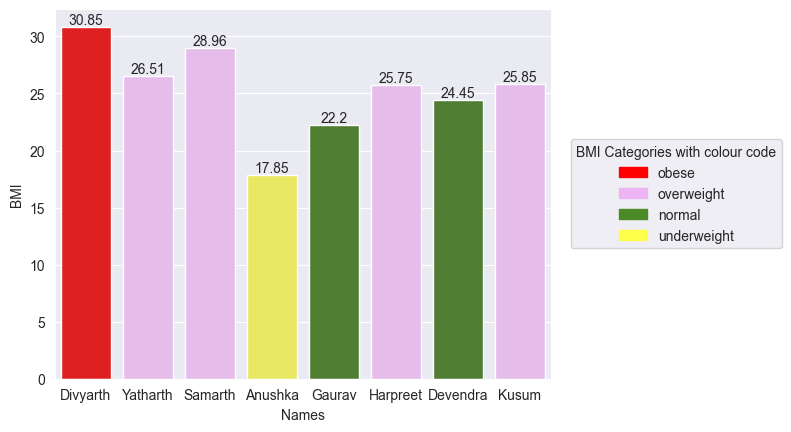

In [9]:
# Defining bmi_category on the calculated BMIs
bmi_category = [calc_bmi_category(bmi) for bmi in bmis]

# Defining colour map for different BMI categories, i.e. 'underweight', 'normal', 'overweight' and 'obese'.
colour_map = {'obese': '#ff0000', 'overweight': '#ecb4f2', 'normal': '#4c8a25', 'underweight': '#feff4b'}

# Creating bar plot
plot = sns.barplot(x=names, y=bmis, palette=[colour_map.get(cat) for cat in bmi_category])
patches = [matplotlib.patches.Patch(color=colour_map.get(cat), label=cat) for cat in colour_map.keys()]

# Defining the legend for display
plt.legend(handles=patches, bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0,
           title="BMI Categories with colour code", fancybox=True)

# Updating X, Y axis labels
plt.xlabel(xlabel="Names"), plt.ylabel(ylabel="BMI")

# Show bar labels as BMI values
plot.bar_label(plot.containers[0])

# Display plot
plt.show()

As per the bar plot visualization, we can interpret that:
- 1 person lie in Obese category.
- 4 persons lie in Overweight category.
- 2 person lie in Normal category.
- 1 person lie in Underweight category.

So as per the data, we can interpret in 2 ways:
- Medical View
    - Doctor needs to advise Divyarth as he falls in obese category, which can cause other diseases also.
    - Healthcare can run an analysis over different BMI categories, via which they can make a diet chart, exercise chart and more and can target the specific audience on the basis of the weight group they lie in.
- Society View
    - As per naive term, an individual can himself know what category he lies and can make his own motivation up for this.

## Benefits and Limitations of BMI
### Benefits:
- Ease of calculation of BMI, which can help to categorise population for medical purpose.
- Researchers can use this BMI, to help obese/overweight persons, via defining some exercise plans, diet plans and more.
- Companies can use different target population models for their analysis.
- Helps as an awareness in society.

### Limitations:
- As BMI is a simple calculation which doesn't cater age, sex, area/region, and many more, leading to wrong categorization.
- Can lead to the wrong understanding of being healthy, as it only focuses over height and weight.

## Alternatives of BMI
As BMI metric has some limitations, so some alternative approaches are introduced, like:
- Corpulence index (exponent of 3)
- New BMI (exponent of 2.5)
- BMI prime (exponent of 2, normalization factor)
- Waist Circumference (WC)
- Waist to Hip Ration (WHR)
- Surface-based body shape index
- Modified body mass index
- Body Fat Percentage
- Bioelectrical Impedance Analysis (BIA)
- Dual Energy X-ray Absorptiometry (DXA)
- Biomarkers

## Summary
In this report we have worked with Body Mass Index(BMI), where we have seen different categories of weight groups, benefits and limitations and what are different alternatives of BMI for assessing body composition and health.
To understand this case study we have checked BMI for 6 persons, where we have calculated both BMI, i.e. old style and  New BMI (exponent of 2.5).
With the help of graphical visualizations we have categorised the details as bar plot where the bar colours depend on the BMI categories.